In [2]:
import numpy as np
import xarray as xr

In [35]:
filesource = '/project2/tas1/abacus/data1/tas/archive/Reanalysis/ERA5/era5_radcs_1979_2020.nc'

with xr.open_dataset(filesource) as ds:
    print (ds.keys())
    print (ds.variables)

KeysView(<xarray.Dataset>
Dimensions:    (time: 504, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-12-01
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    ssrc       (time, latitude, longitude) float32 ...
    strc       (time, latitude, longitude) float32 ...
    tsrc       (time, latitude, longitude) float32 ...
    ttrc       (time, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.9.2 (http://mpimet.mpg.de/...
    Conventions:  CF-1.6
    history:      Wed Oct 27 11:01:19 2021: cdo mergetime era5_radcs_1979_200...
    CDO:          Climate Data Operators version 1.9.2 (http://mpimet.mpg.de/...)
Frozen({'time': <xarray.IndexVariable 'time' (time: 504)>
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T0

In [8]:
import xarray as xr
era5_sshf = xr.open_dataset("/project2/rossby/group11/era5_sshf_1979_2020_tzmean.nc")['sshf'].values
era5_slhf = xr.open_dataset("/project2/rossby/group11/era5_slhf_1979_2020_tzmean.nc")['slhf'].values
era5_ssr = xr.open_dataset("/project2/rossby/group11/era5_ssr_1979_2020_tzmean.nc")['ssr'].values #surface solar radiation (downward)
era5_str = xr.open_dataset("/project2/rossby/group11/era5_str_1979_2020_tzmean.nc")['str'].values #surface net thermal radiation (downward)
era5_tsr = xr.open_dataset("/project2/rossby/group11/era5_tsr_1979_2020_tzmean.nc")['tsr'].values #TOA solar radiation (shortwave, up)
era5_ttr = xr.open_dataset("/project2/rossby/group11/era5_ttr_1979_2020_tzmean.nc")['ttr'].values#TOA thermal radiation (longwave, up)

lat = xr.open_dataset("/project2/rossby/group11/era5_sshf_1979_2020_tzmean.nc")['latitude'].values

Text(0, 0.5, 'Energy Flux (W/m^-2)')

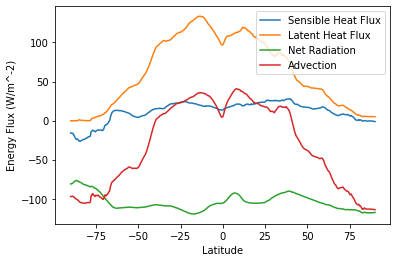

In [34]:
import matplotlib.pyplot as plt
era5_sshf_wm2 = era5_sshf/86400
era5_slhf_wm2 = era5_slhf/86400
era5_ra_wm2 = (era5_tsr + era5_ttr - era5_ssr - era5_str)/86400
era5_fa_wm2 = era5_ra_wm2 - era5_sshf_wm2 - era5_slhf_wm2
plt.plot(lat, -era5_sshf_wm2, label = "Sensible Heat Flux")
plt.plot(lat, -era5_slhf_wm2, label = "Latent Heat Flux")
plt.plot(lat, era5_ra_wm2, label = "Net Radiation")
plt.plot(lat, era5_fa_wm2, label = "Advection")
plt.legend()
plt.xlabel("Latitude")
plt.ylabel("Energy Flux (W/m^-2)")
#positive: into the column
#negative: out of the column

Text(0, 0.5, 'R1 (unitless)')

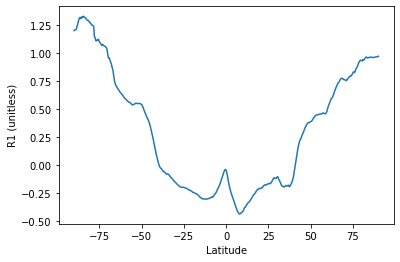

In [33]:
R1 = era5_fa_wm2/era5_ra_wm2
plt.plot(lat, R1)
plt.xlabel("Latitude")
plt.ylabel("R1 (unitless)")